In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')
data.head()

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [4]:
df = data.drop('Unnamed: 0', axis = 1)

In [5]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1.0
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1.0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1.0
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1.0


In [6]:
# dependent and independent variable

X = df.drop('FWI', axis = 1)
y = df['FWI']

## Train Test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 50)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(182, 11)
(182,)
(61, 11)
(61,)


## Standardization


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

# Freature Selection using Correlation

<Axes: >

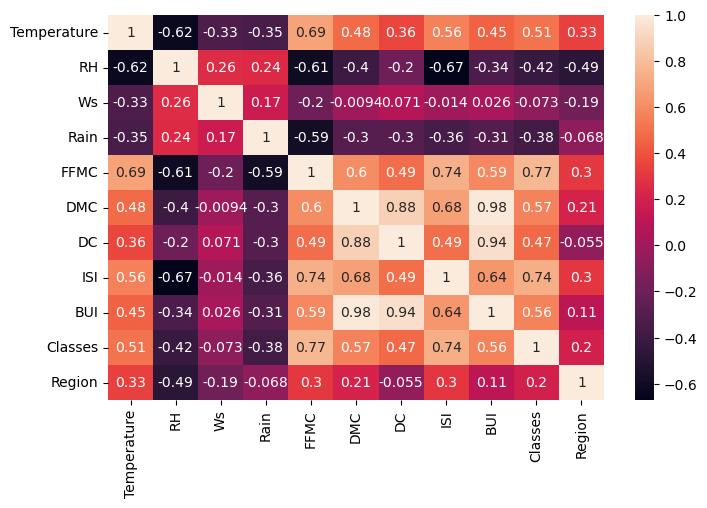

In [9]:
# corr = X_train.corr)
plt.figure(figsize = (8,5))
sns.heatmap(X_train.corr(), annot = True)

In [10]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [11]:
correlation(df, 0.8)

{'BUI', 'DC', 'FWI'}

# this implies that we can delete these features as they are already correlated 

Text(0.5, 1.0, 'Features after scaling')

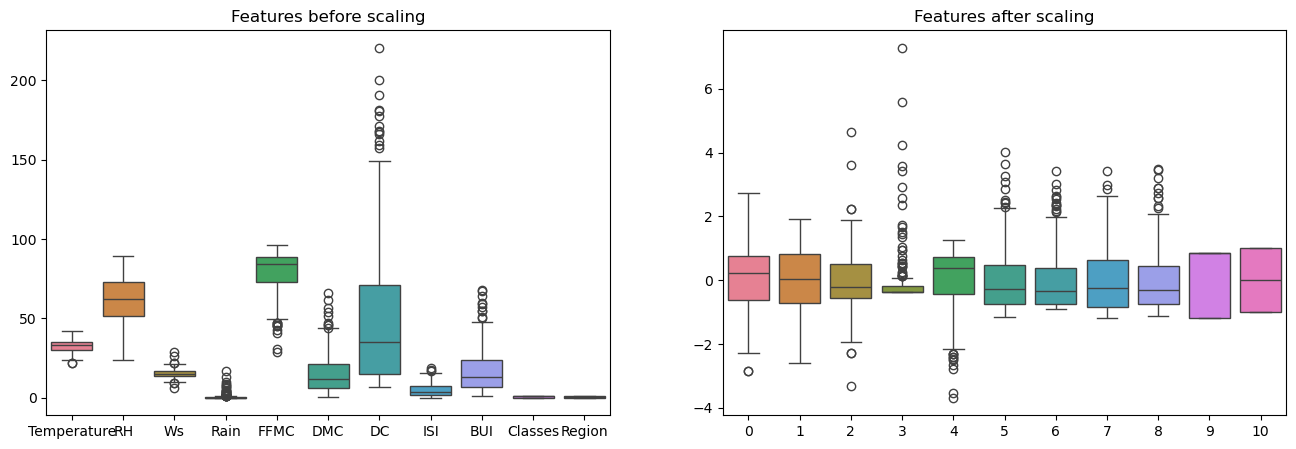

In [12]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title("Features before scaling")

plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title("Features after scaling")

# Done with the EDA and now applying Linear Regression model

In [13]:
# importing Libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
LR = LinearRegression()
LR.fit(X_train_scaled, y_train)

LinearRegression()

In [15]:
# Predicting values of X_test

y_pred = LR.predict(X_test_scaled) 
y_pred

array([ 5.88516003e-01, -4.10203251e-01,  5.42197923e-01,  2.45184682e+00,
        2.22416491e+00, -9.66318101e-02,  2.55951245e-01,  4.70309282e+00,
        5.60685749e-01,  1.07269187e+00,  3.17822129e+00,  1.87582338e+00,
        1.91026226e+01,  2.78448695e-01,  1.04665058e+01,  2.11118299e+01,
        1.97772510e-02,  2.88379512e+01,  1.54646789e+01,  1.40314239e+01,
        7.66185089e+00,  5.59383665e-02,  8.32874885e+00,  5.07349942e+00,
        1.37545880e+00, -8.25379680e-02,  2.73428829e-01,  1.28704534e+00,
       -7.31520443e-01,  6.56039542e-01,  5.38703123e+00,  1.35612404e+01,
        4.93476023e+00,  9.97540074e+00,  7.27172656e+00,  5.49485427e-01,
       -6.89046665e-05,  3.52968376e-01,  1.03175038e+01,  6.48714876e+00,
        8.14160419e+00,  2.46745204e+01,  1.76048258e+00,  1.72624861e+01,
       -1.82569386e-01,  1.71193566e+01,  7.76223795e+00,  1.86043877e+00,
        1.32490462e+01,  1.42330534e+00,  1.22842968e+01,  9.66267755e+00,
        1.29520821e+00, -

In [16]:
# coef and intercept

coef = LR.coef_
intercept = LR.intercept_
print("coefficient : ", coef)
print("intercept: ", intercept)


coefficient :  [-0.08405633 -0.25923864 -0.04168743 -0.00846495 -0.87695758  0.38840291
 -0.6660522   4.68558668  3.92585745  0.39461162 -0.20542904]
intercept:  7.374175824175825


In [17]:
# checking Accuracy

from sklearn.metrics import mean_absolute_error, r2_score

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 score : ", r2)
print("MAE : ", mae)


R2 score :  0.9889997354357416
MAE :  0.5774217722553122


In [18]:
y_test.shape, y_pred.shape

((61,), (61,))

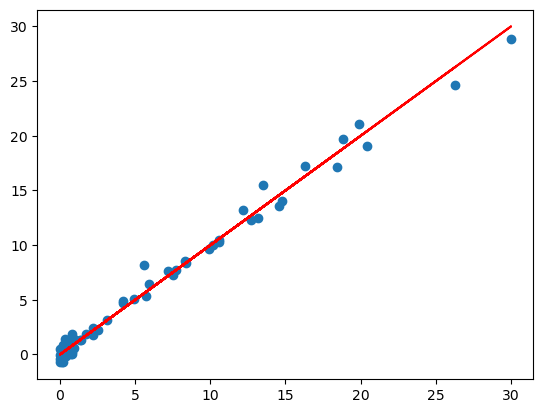

In [19]:
# plotting the data

plt.scatter(y_test, y_pred)
plt.plot(y_test,y_test, color = 'r')

# Lasso Regression
Lasso regression is the embedded method in python for feature selection

R2 score :  0.9839575873183779
MAE :  0.6667155871244299


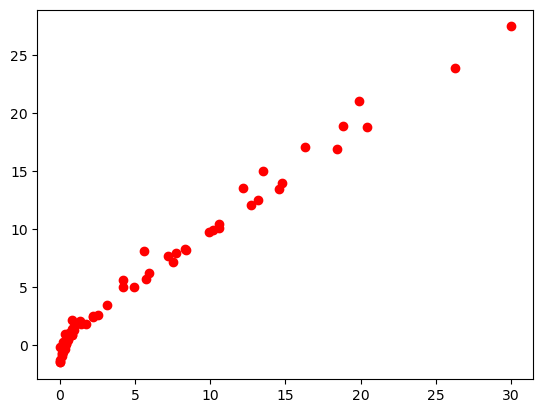

In [20]:
# applying lasso regression and checking accuracy

# Libraries
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error

lasso = Lasso()
lasso.fit(X_train,y_train)

# prediction
y_pred = lasso.predict(X_test)

# checking accuuracy
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 score : ", r2)
print("MAE : ", mae)

plt.scatter(y_test,y_pred, color = 'r')


# Ridge Regression

R2 score :  0.9890979023313461
MAE :  0.5735321837399021


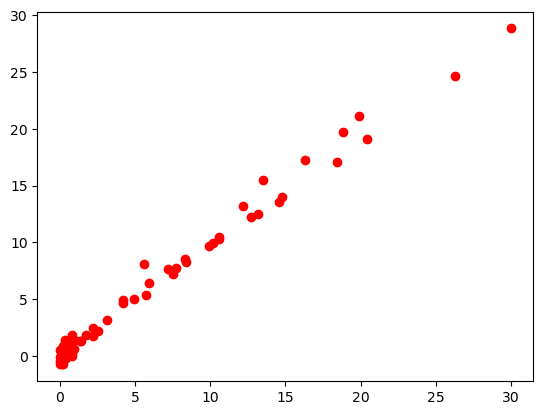

In [21]:
# applying ridge regression and checking accuracy

# Libraries
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error

ridge = Ridge()
ridge.fit(X_train,y_train)

# prediction
y_pred = ridge.predict(X_test)

# checking accuuracy
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 score : ", r2)
print("MAE : ", mae)

plt.scatter(y_test,y_pred, color = 'r')


# Elastic net
### combination of Lasso and ridge

R2 score :  0.9838501460361014
MAE :  0.6680188241001099


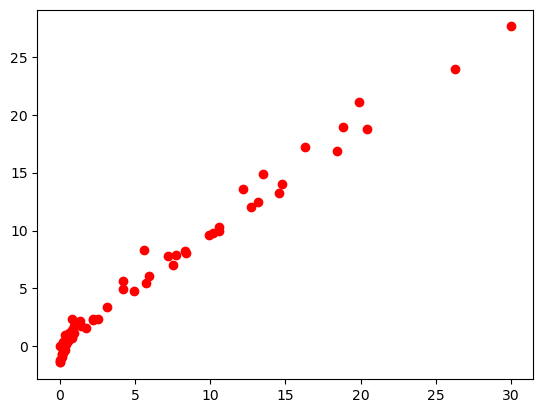

In [22]:
# applying ridge regression and checking accuracy

# Libraries
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error

EN = ElasticNet()
EN.fit(X_train,y_train)

# prediction
y_pred = EN.predict(X_test)

# checking accuuracy
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 score : ", r2)
print("MAE : ", mae)

plt.scatter(y_test,y_pred, color = 'r')